# Determinar la nota final de los estudiantes

En principio se intentaba determinar la nota dependiendo únicamente de las características sociales.
Tras el estudio se vió que salvo unas características muy específicas la correlacionalidad no era lo suficientemente fuerte para determinar la nota, por lo que se integró la nota de escritura y lectura para poder determinar la de matemáticas por su fuerte correlación. Se estudian modelos de árboles de decisión y modelos lineales para determinar cual es el modelo más óptimo. Cuando se utilizaban los datos únicamente sociales se veía una fuerte linealidad en los datos por lo que se entiende que seguramente un modelo lineal será el más adecuado para este tipo de datos.

OBTENER LOS DATOS:

* El dataset que estoy utilizando pertenece a Kaggle y permite su uso, por lo que no necesito de ningún permiso adicional.

In [1]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ruta Github
url="https://raw.githubusercontent.com/Aiadevop/students_note/refs/heads/main/data/StudentsPerformance.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [2]:
# Obtengo la información básica del dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# Resumen estadístico:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
# Estudio las variables categóricas para transformarlas a numéricas
# Lista de columnas categóricas
categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

# Mostrar los valores únicos de cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())



gender:
['female' 'male']

race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:
['standard' 'free/reduced']

test preparation course:
['none' 'completed']


In [5]:
df_rg = df.copy()

# 1. Limpiar nombres de columnas
df_rg.columns = (
    df_rg.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("'", "", regex=False)
    .str.replace("/", "_", regex=False)
)

# 2. Limpiar valores en celdas de tipo string
df_rg = df_rg.apply(lambda col: col.map(lambda x: x.strip().replace("'", "").replace(" ", "_") if isinstance(x, str) else x))

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df_num = df_rg.copy()

# -----------------------------
# 1️⃣ Label Encoding para binarias
# -----------------------------
label_encoders = {
    'gender': {'female': 0, 'male': 1},
    'lunch': {'free/reduced': 0, 'standard': 1},
    'test_preparation_course': {'none': 0, 'completed': 1}
}

for col, mapping in label_encoders.items():
    df_num[col] = df_num[col].map(mapping)

# -----------------------------
# 2️⃣ One-Hot Encoding para variables multiclase
# -----------------------------
ohe_cols = ['race_ethnicity', 'parental_level_of_education']
ohe = OneHotEncoder(drop='first', sparse_output=False) # drop='first' evita multicolinealidad

ohe_result = ohe.fit_transform(df_num[ohe_cols])
ohe_df = pd.DataFrame(
    ohe_result,
    columns=ohe.get_feature_names_out(ohe_cols),
    index=df_num.index
)

# -----------------------------
# 3️⃣ Unir al DataFrame original y eliminar columnas originales
# -----------------------------
df_num = df_num.drop(columns=ohe_cols)
df_num = pd.concat([df_num, ohe_df], axis=1)


In [7]:
df_num.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school
0,0,1,0,72,72,74,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,1,1,69,90,88,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,90,95,93,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,47,57,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,76,78,75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Escalo las Variablesfrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
# Copiamos el DF numérico ya preparado
df_scaled = df_num.copy()

# Columnas que queremos escalar (todas las numéricas, incluidas dummy)
cols_to_scale = df_scaled.columns

# Inicializamos el scaler
scaler = StandardScaler()

# Ajustamos y transformamos
scaled_array = scaler.fit_transform(df_scaled[cols_to_scale])

# Creamos nuevo DataFrame con los valores escalados
df_scaled = pd.DataFrame(scaled_array, columns=cols_to_scale, index=df_scaled.index)

# Vista rápida
df_scaled.head()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school
0,-0.964625,0.741881,-0.746748,0.390024,0.193999,0.391492,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933
1,-0.964625,0.741881,1.339140,0.192076,1.427476,1.313269,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933
2,-0.964625,0.741881,-0.746748,1.577711,1.770109,1.642475,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933
3,1.036672,-1.347925,-0.746748,-1.259543,-0.833899,-1.583744,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933
4,1.036672,0.741881,-0.746748,0.653954,0.605158,0.457333,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933


In [9]:
# Después de entrenar el scaler
# Obtener los parámetros del scaler
scaler_mean = scaler.mean_
scaler_scale = scaler.scale_

# Mostrar los parámetros
print("Media del scaler:")
print(scaler_mean)
print("\nDesviación estándar del scaler:")
print(scaler_scale)

# También puedes guardarlos en variables para usarlos después
print("\nParámetros como listas:")
print("Mean:", scaler_mean.tolist())
print("Scale:", scaler_scale.tolist())

Media del scaler:
[4.8200e-01 6.4500e-01 3.5800e-01 6.6089e+01 6.9169e+01 6.8054e+01
 1.9000e-01 3.1900e-01 2.6200e-01 1.4000e-01 1.1800e-01 1.9600e-01
 5.9000e-02 2.2600e-01 1.7900e-01]

Desviación estándar del scaler:
[ 0.49967589  0.47851332  0.47941214 15.15549666 14.59289002 15.18805728
  0.3923009   0.46608905  0.43972264  0.34698703  0.32260812  0.39696851
  0.2356247   0.41823917  0.38335232]

Parámetros como listas:
Mean: [0.482, 0.645, 0.358, 66.089, 69.169, 68.054, 0.19, 0.319, 0.262, 0.14, 0.118, 0.196, 0.059, 0.226, 0.179]
Scale: [0.4996758949559204, 0.478513322698543, 0.47941214002150595, 15.155496659628149, 14.592890015346516, 15.188057281956768, 0.39230090491866065, 0.46608904728603107, 0.439722639853806, 0.34698703145794946, 0.32260812141048156, 0.3969685126052191, 0.23562470159132295, 0.4182391660282428, 0.3833523183704515]


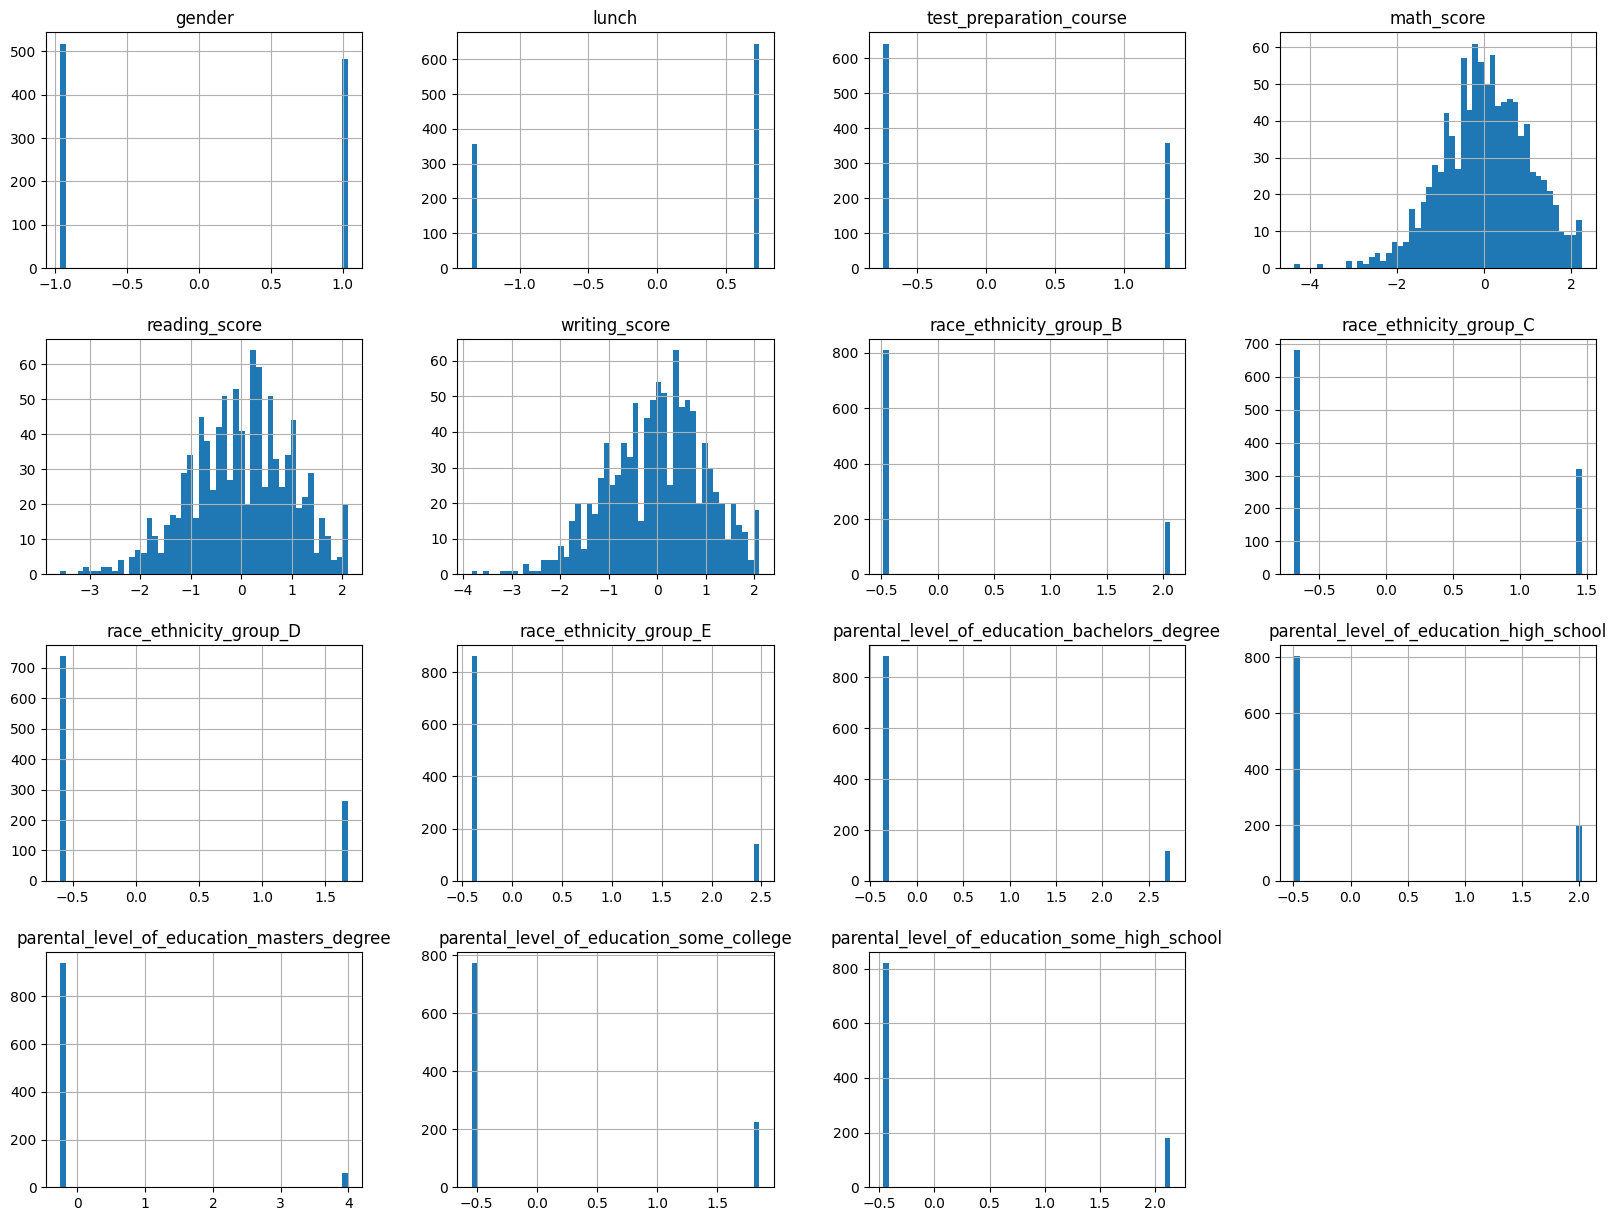

In [10]:
# sacamos las gráficas de cada feature
import matplotlib.pyplot as plt

df_scaled.hist(bins=50, figsize=(20,15))
plt.show()

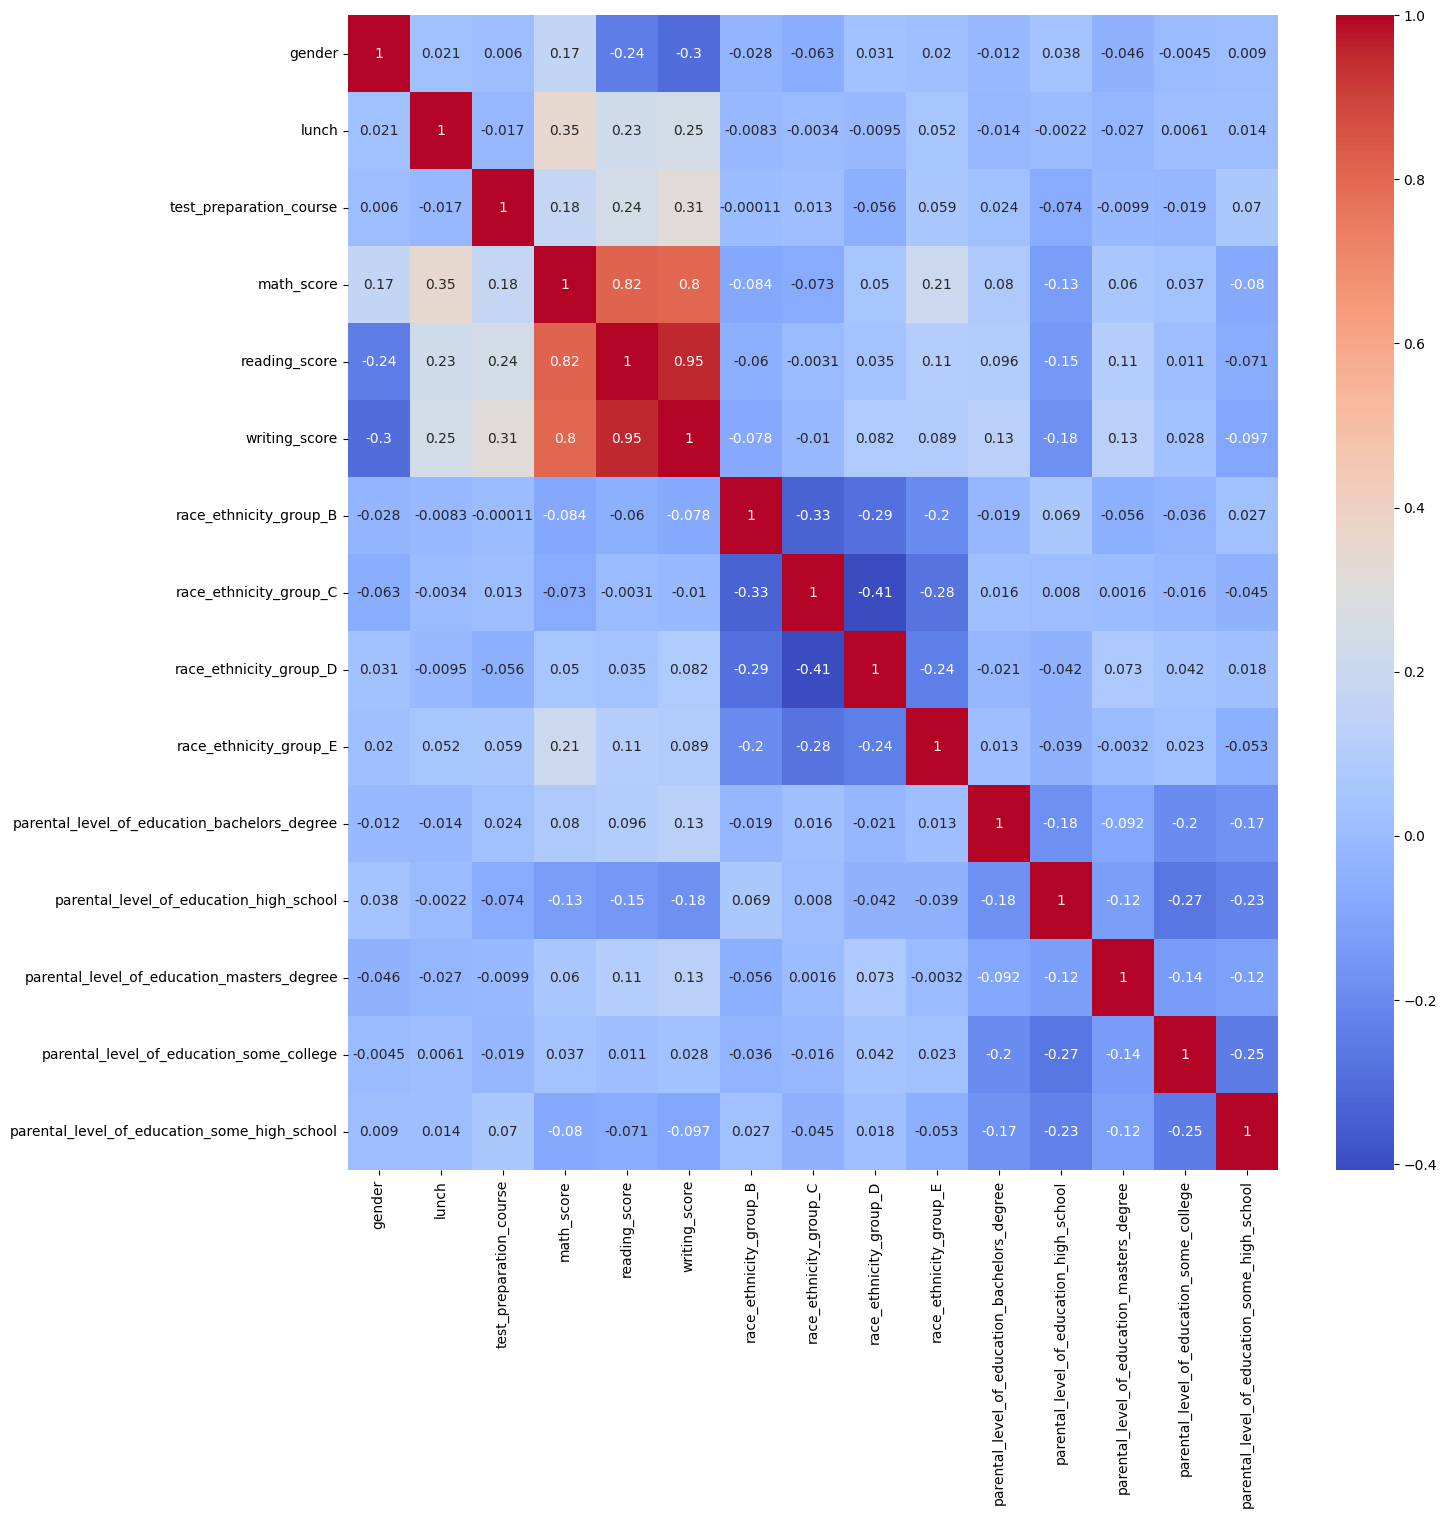

In [11]:
# Mapa de calor.
co_mx= df_scaled.corr()
# print(co_mx)
plt.figure(figsize= (15,15))
sns.heatmap(co_mx, annot=True , cmap = 'coolwarm')
plt.show()

In [12]:
# 1️⃣ Correlación de todas las variables con math_score
corr_target = df_scaled.corr()['math_score'].sort_values(ascending=False)

# Vemos correlaciones con math_score
print(corr_target)

# 2️⃣ Fijamos un umbral para considerar "variables relevantes"
#    (ejemplo: |corr| > 0.1, tú puedes ajustar el valor)
umbral = 0.1
features_relevantes = corr_target[abs(corr_target) > umbral].index.tolist()

# Nos aseguramos de incluir math_score (target)
if 'math_score' not in features_relevantes:
    features_relevantes.append('math_score')

# 3️⃣ DataFrame para regresión lineal (solo features relevantes)
df_linear = df_scaled[features_relevantes].copy()

# 4️⃣ DataFrame para árboles (todas las features, no filtramos nada)
df_tree = df_scaled.copy()

# 5️⃣ Guardamos los dos dataframes
print("📊 DataFrame para regresión lineal:")
display(df_linear.head())

print("\n🌳 DataFrame para árboles:")
display(df_tree.head())


math_score                                      1.000000
reading_score                                   0.817580
writing_score                                   0.802642
lunch                                           0.350877
race_ethnicity_group_E                          0.205855
test_preparation_course                         0.177702
gender                                          0.167982
parental_level_of_education_bachelors_degree    0.079664
parental_level_of_education_masters_degree      0.060417
race_ethnicity_group_D                          0.050071
parental_level_of_education_some_college        0.037056
race_ethnicity_group_C                         -0.073387
parental_level_of_education_some_high_school   -0.079852
race_ethnicity_group_B                         -0.084250
parental_level_of_education_high_school        -0.128725
Name: math_score, dtype: float64
📊 DataFrame para regresión lineal:


,math_score,reading_score,writing_score,lunch,race_ethnicity_group_E,test_preparation_course,gender,parental_level_of_education_high_school
0,0.390024,0.193999,0.391492,0.741881,-0.403473,-0.746748,-0.964625,-0.493742
1,0.192076,1.427476,1.313269,0.741881,-0.403473,1.339140,-0.964625,-0.493742
2,1.577711,1.770109,1.642475,0.741881,-0.403473,-0.746748,-0.964625,-0.493742
3,-1.259543,-0.833899,-1.583744,-1.347925,-0.403473,-0.746748,1.036672,-0.493742
4,0.653954,0.605158,0.457333,0.741881,-0.403473,-0.746748,1.036672,-0.493742



🌳 DataFrame para árboles:


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school
0,-0.964625,0.741881,-0.746748,0.390024,0.193999,0.391492,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933
1,-0.964625,0.741881,1.339140,0.192076,1.427476,1.313269,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933
2,-0.964625,0.741881,-0.746748,1.577711,1.770109,1.642475,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933
3,1.036672,-1.347925,-0.746748,-1.259543,-0.833899,-1.583744,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933
4,1.036672,0.741881,-0.746748,0.653954,0.605158,0.457333,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933


In [ ]:
from google.colab import files

# Guarda el DataFrame como CSV
df_linear.to_csv('df_linear.csv', index=False)

# Descarga el archivo
files.download('df_linear.csv')

# Guarda el DataFrame como CSV
df_tree.to_csv('df_tree.csv', index=False)

# Descarga el archivo
files.download('df_tree.csv')